In [0]:
import numpy as np
import pandas as pd

In [0]:
## Load data
train_en = pd.read_csv('/content/drive/My Drive/Deep Learning Data/Multilingual Toxic Comment Classification/jigsaw-toxic-comment-train.csv', index_col = 0)
train_en.head()
len(train_en)

223549

In [0]:
unbiased = pd.read_csv('/content/drive/My Drive/Deep Learning Data/Multilingual Toxic Comment Classification/jigsaw-unintended-bias-train.csv', index_col = 0)
unbiased.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,comment_text,toxic,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
59848,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:41.987077+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
59849,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:42.870083+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
59852,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:45.222647+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
59855,Is this something I'll be able to install on m...,0.000000,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:47.601894+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
59856,haha you guys are a bunch of losers.,0.893617,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-29 10:50:48.488476+00,2,NaN,2006,rejected,0,0,0,1,0,0.0,4,47


In [0]:
test = pd.read_csv('/content/drive/My Drive/Deep Learning Data/Multilingual Toxic Comment Classification/test.csv', index_col =0)
test.head()

,content,lang
id,,
0,Doctor Who adlı viki başlığına 12. doctor olar...,tr
1,"Вполне возможно, но я пока не вижу необходимо...",ru
2,"Quindi tu sei uno di quelli conservativi , ...",it
3,Malesef gerçekleştirilmedi ancak şöyle bir şey...,tr
4,:Resim:Seldabagcan.jpg resminde kaynak sorunu ...,tr


In [0]:
val = pd.read_csv('/content/drive/My Drive/Deep Learning Data/Multilingual Toxic Comment Classification/validation.csv', index_col = 0)
val.head()
len(val)

8000

In [0]:
train_en = train_en.iloc[:, [0, 1]]
train_en.head()

,comment_text,toxic
id,,
0000997932d777bf,Explanation\nWhy the edits made under my usern...,0
000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0
000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0
0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0
0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0


In [0]:
unintended_bias = unbiased.iloc[:, [0,1]]
unintended_bias.head()
len(unintended_bias)

1902194

In [0]:
val_df = val.iloc[:,[0,2]]
val_df.head()
len(val_df)

8000

In [0]:
train_df = pd.concat([train_en, unintended_bias], axis = 0).reset_index(drop =True)

In [0]:
train_df.head()

print(f'There are {len(train_df)} English comments')

There are 2125743 English comments


In [0]:
no_toxic = len(train_df[train_df['toxic'] > 0.5])
no_comments = len(train_df)
print('Number of toxic comments in training dataset: ', no_toxic)
print()
print(f'Fraction of toxic comments in training dataset: ', round(no_toxic/no_comments, 3))

Number of toxic comments in training dataset:  133610

Fraction of toxic comments in training dataset:  0.063


In [0]:
no_toxic_val = len(val_df[val_df['toxic'] == 1])
no_comments_val = len(val_df)

print('Number of toxic comments in validation dataset: ', no_toxic_val)
print()
print(f'Fraction of toxic comments in valdation dataset: ', round(no_toxic_val/no_comments_val, 3))


Number of toxic comments in validation dataset:  1230

Fraction of toxic comments in valdation dataset:  0.154


**We are having heavily imbalanced dataset. Perhap weighted loss and RandomOversampling and RandomUndersampling are needed.
Another way to think about that is Data Augmentation for Text**


In [0]:
### Lets see the distribution of length of all comments
from tqdm import tqdm
tqdm.pandas()

train_df['length'] = train_df['comment_text'].progress_apply(lambda x: len(x.split(" ")))
val_df['length'] = val_df['comment_text'].progress_apply(lambda x: len(x.split(" ")))

100%|██████████| 8000/8000 [00:00<00:00, 174358.55it/s]


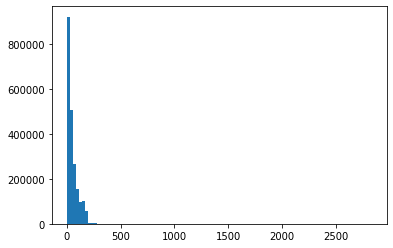

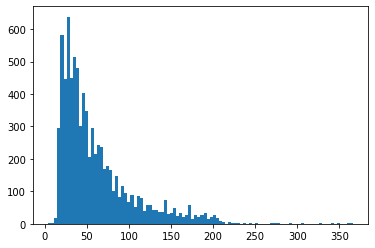

In [0]:
import matplotlib.pyplot as plt
#plot histogram of comments length
plt.hist(train_df['length'], bins = 100)
plt.show()
plt.hist(val_df['length'], bins = 100)
plt.show()

In [0]:
## So, most of our comments having length of less than 250 tokens. Thus we can set the maxlength of Tokenizer to 256 (including [CLS] and [SEP])
train_df.to_csv('clean_train_df.csv')
val_df.to_csv('clean_val_df.csv')

In [0]:
!cp clean_train_df.csv "/content/drive/My Drive/Deep Learning Data/Multilingual Toxic Comment Classification"
!cp clean_val_df.csv "/content/drive/My Drive/Deep Learning Data/Multilingual Toxic Comment Classification"